# Decision Trees and Random Forests in Python



## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('kyphosis.csv')

df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


## EDA

We'll just check out a simple pairplot for this small dataset.

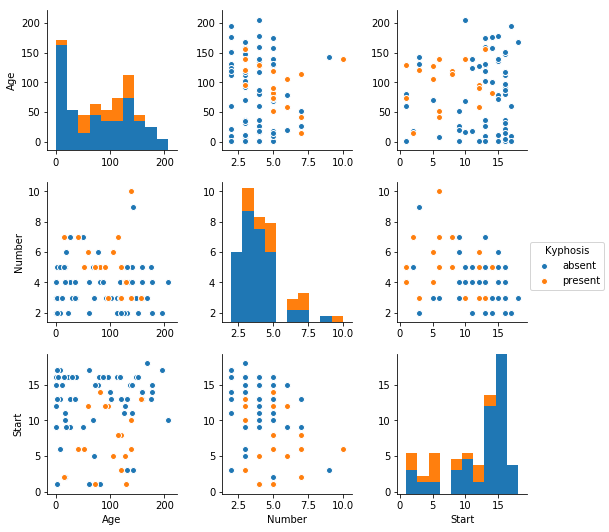

In [4]:
sns.pairplot(df,hue='Kyphosis')

## Train Test Split

Let's split up the data into a training set and a test set!

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)

y = df['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=53)

## Decision Trees

We'll start just by training a single decision tree.

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dtree = DecisionTreeClassifier()

In [9]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [10]:
pred = dtree.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

     absent       0.82      0.90      0.86        20
    present       0.33      0.20      0.25         5

avg / total       0.72      0.76      0.74        25



In [13]:
print (confusion_matrix(pred,y_test))

[[18  2]
 [ 4  1]]


## Random Forests


In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rfc = RandomForestClassifier(n_estimators=200)

In [16]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
rfc_pred = rfc.predict(X_test)

In [18]:
print(confusion_matrix(rfc_pred,y_test))
print('\n')
print (classification_report(rfc_pred,y_test))

[[19  2]
 [ 3  1]]


             precision    recall  f1-score   support

     absent       0.86      0.90      0.88        21
    present       0.33      0.25      0.29         4

avg / total       0.78      0.80      0.79        25



**Now let's compare the decision tree model to a random forest.**

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees.
It requires you to install the pydot library. 

In [19]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

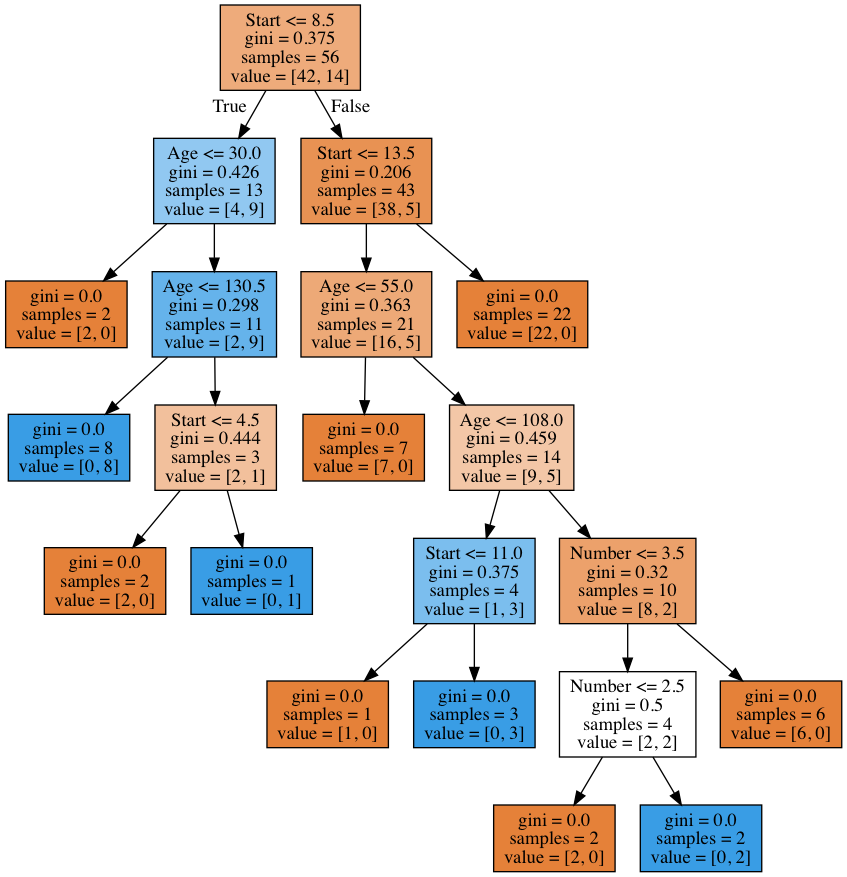

In [20]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,
               filled=True, )

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# Great Job!